In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Exploratory data analysis

This project will use the [Heart Failure Prediction dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

Given some parameters of the person, predict whether the person has heart failure.

The exploratory data analysis will inspect the data to see whether the dataset is balanced, has outliers, determine ranges of values, etc.

In [2]:
orig_df = pd.read_csv('data/heart.csv')
orig_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
orig_df.shape

(918, 12)

In [4]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
orig_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
orig_df.columns = orig_df.columns.str.replace(r'\W+', '_', regex=True).str.lower()
orig_df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
orig_df.isnull().any()

age               False
sex               False
chestpaintype     False
restingbp         False
cholesterol       False
fastingbs         False
restingecg        False
maxhr             False
exerciseangina    False
oldpeak           False
st_slope          False
heartdisease      False
dtype: bool

In [8]:
categorical = ['sex', 'chestpaintype', 'fastingbs', 'restingecg', 'exerciseangina', 'st_slope']
numerical = ['age', 'restingbp', 'cholesterol', 'maxhr']

orig_df.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [9]:
for col in orig_df.columns:
    display(orig_df[col].value_counts())
    print("-------------------------------")

age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

-------------------------------


sex
M    725
F    193
Name: count, dtype: int64

-------------------------------


chestpaintype
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

-------------------------------


restingbp
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: count, Length: 67, dtype: int64

-------------------------------


cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

-------------------------------


fastingbs
0    704
1    214
Name: count, dtype: int64

-------------------------------


restingecg
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

-------------------------------


maxhr
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: count, Length: 119, dtype: int64

-------------------------------


exerciseangina
N    547
Y    371
Name: count, dtype: int64

-------------------------------


oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: count, dtype: int64

-------------------------------


st_slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

-------------------------------


heartdisease
1    508
0    410
Name: count, dtype: int64

-------------------------------


In [10]:
orig_df.duplicated().sum() 

0

In [11]:
orig_df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
# cholesterol = 0 and restingbp = 0 are not realistic, so set the 0 values to NaN
orig_df.cholesterol = np.where(orig_df['cholesterol'] == 0, np.nan, orig_df['cholesterol'])
orig_df.restingbp = np.where(orig_df['restingbp'] == 0, np.nan, orig_df['restingbp'])

In [13]:
orig_df.isnull().any()

age               False
sex               False
chestpaintype     False
restingbp          True
cholesterol        True
fastingbs         False
restingecg        False
maxhr             False
exerciseangina    False
oldpeak           False
st_slope          False
heartdisease      False
dtype: bool

<Axes: xlabel='age', ylabel='Count'>

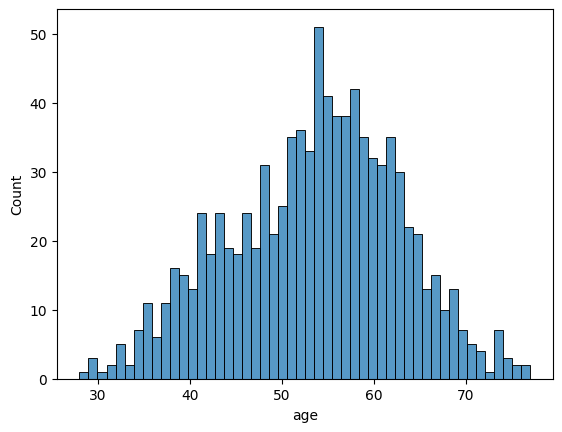

In [14]:
sns.histplot(orig_df.age, bins=50)

<Axes: xlabel='restingbp', ylabel='Count'>

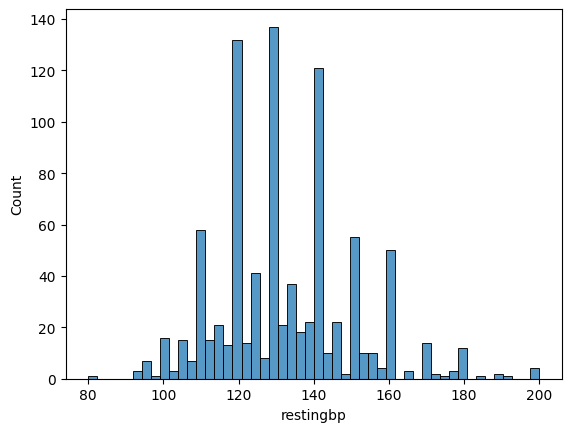

In [15]:
sns.histplot(orig_df.restingbp, bins=50)

<Axes: xlabel='cholesterol', ylabel='Count'>

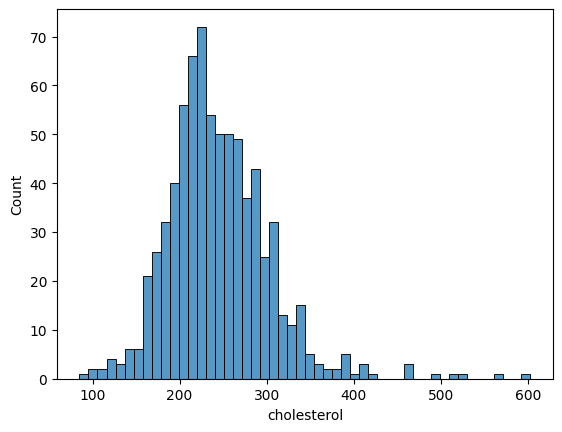

In [16]:
sns.histplot(orig_df.cholesterol, bins=50)

<Axes: xlabel='oldpeak', ylabel='Count'>

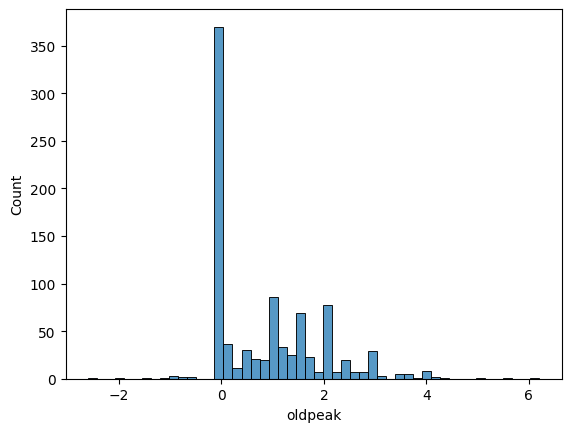

In [17]:
sns.histplot(orig_df.oldpeak, bins=50)

In [18]:
mod_df = orig_df.dropna()
orig_df.shape, mod_df.shape

((918, 12), (746, 12))

## Feature correlation

In [19]:
mod_df[numerical].corrwith(mod_df.heartdisease)

age            0.298617
restingbp      0.173242
cholesterol    0.103866
maxhr         -0.377212
dtype: float64

In [20]:
mod_df[numerical + ['heartdisease']].corr()

,age,restingbp,cholesterol,maxhr,heartdisease
age,1.000000,0.259865,0.058758,-0.382112,0.298617
restingbp,0.259865,1.000000,0.095939,-0.125774,0.173242
cholesterol,0.058758,0.095939,1.000000,-0.019856,0.103866
maxhr,-0.382112,-0.125774,-0.019856,1.000000,-0.377212
heartdisease,0.298617,0.173242,0.103866,-0.377212,1.000000


In [21]:
cat_df = mod_df.copy()

for col in categorical:
    cat_df[col] = cat_df[col].astype('category').cat.codes

cat_df[categorical + ['heartdisease']].corr()

,sex,chestpaintype,fastingbs,restingecg,exerciseangina,st_slope,heartdisease
sex,1.000000,-0.120709,0.096075,0.042296,0.192579,-0.142808,0.292779
chestpaintype,-0.120709,1.000000,-0.000226,-0.046851,-0.394822,0.238469,-0.395776
fastingbs,0.096075,-0.000226,1.000000,0.031518,0.109995,-0.157780,0.160594
restingecg,0.042296,-0.046851,0.031518,1.000000,0.085602,0.017472,0.009935
exerciseangina,0.192579,-0.394822,0.109995,0.085602,1.000000,-0.473543,0.551834
st_slope,-0.142808,0.238469,-0.157780,0.017472,-0.473543,1.000000,-0.597334
heartdisease,0.292779,-0.395776,0.160594,0.009935,0.551834,-0.597334,1.000000


In [22]:
# due to how some columns might impact the heart disease prediction, we'll drop the columsn that
# are either very strongly positively/negatively correlated (abs(correlation) > 0.5)
categorical = ['sex', 'chestpaintype', 'fastingbs']
numerical = ['age', 'restingbp', 'cholesterol', 'maxhr']

# Training (to move to train.py)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, mutual_info_score, roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

In [24]:
seed = 1

In [25]:
df_full_train, df_test = train_test_split(mod_df, test_size=0.2, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

In [26]:
len(df_train), len(df_val), len(df_test)

(447, 149, 150)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
y_train = df_train.heartdisease.values
y_val = df_val.heartdisease.values
y_test = df_test.heartdisease.values

del df_train['heartdisease']
del df_val['heartdisease']
del df_test['heartdisease']

In [29]:
def get_xtrain():
    train_dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    return X_train, dv

def get_xval(df, dv):
    val_dicts = df[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    return X_val

def get_x_nontrain(df, dv):
    df_dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(df_dicts)

    return X

## Train logistic regression model

In [30]:
def train_logistic_regression(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    # consider scaling - got an error about needing to scale
    model = LogisticRegression(C=C, max_iter=2000, random_state=seed)
    model.fit(X_train, y_train)
    
    return dv, model

In [31]:
def predict_logistic_regression(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [32]:
dv, model = train_logistic_regression(df_train, y_train)
y_pred = predict_logistic_regression(df_val, dv, model)

### Model evaluation

In [33]:
# first try with accuracy score
thresholds = np.linspace(0, 1, 21)

acc_scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    acc_scores.append(score)

0.00 0.463
0.05 0.591
0.10 0.658
0.15 0.698
0.20 0.745
0.25 0.772
0.30 0.799
0.35 0.779
0.40 0.785
0.45 0.799
0.50 0.765
0.55 0.752
0.60 0.738
0.65 0.732
0.70 0.752
0.75 0.725
0.80 0.685
0.85 0.624
0.90 0.597
0.95 0.544
1.00 0.537


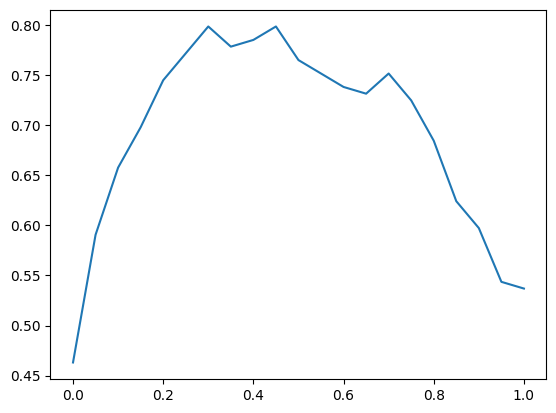

In [34]:
plt.plot(thresholds, acc_scores)

# optimal threshold is 0.40

In [35]:
roc_auc_score(y_val, y_pred)

0.8496376811594203

In [36]:
from tqdm.auto import tqdm

/Users/carise/.local/share/virtualenvs/ml-zoomcamp-midterm-4hkEySmr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
# cross validation
C_multi = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
n_splits = 5

for C in tqdm(C_multi):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.heartdisease.values
        y_val = df_val.heartdisease.values
    
        dv, model = train_logistic_regression(df_train, y_train, C=C)
        y_pred = predict_logistic_regression(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|████████████▏                                                                        | 1/7 [00:00<00:01,  5.64it/s]

C=0.001 0.756 +- 0.051


 29%|████████████████████████▎                                                            | 2/7 [00:00<00:00,  5.16it/s]

C=0.01 0.809 +- 0.043


 43%|████████████████████████████████████▍                                                | 3/7 [00:00<00:01,  3.50it/s]

C=0.1 0.858 +- 0.030


 57%|████████████████████████████████████████████████▌                                    | 4/7 [00:01<00:01,  2.63it/s]

C=0.5 0.861 +- 0.030


 71%|████████████████████████████████████████████████████████████▋                        | 5/7 [00:01<00:00,  2.17it/s]

C=1 0.861 +- 0.030


 86%|████████████████████████████████████████████████████████████████████████▊            | 6/7 [00:02<00:00,  2.18it/s]

C=5 0.860 +- 0.031


100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]

C=10 0.860 +- 0.030


In [38]:
scores

[0.8709677419354839,
 0.8688046647230321,
 0.8036723163841808,
 0.8956546598056032,
 0.8617863199547767]

In [39]:
# optimal C is 0.5, let's see how the model performs on test data

dv, model_log_reg = train_logistic_regression(df_full_train, df_full_train.heartdisease.values, C=0.5)
y_pred = predict_logistic_regression(df_test, dv, model_log_reg)
model_log_reg

LogisticRegression(C=0.5, max_iter=2000, random_state=1)

In [40]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8368693171688357

## Train decision tree model

In [41]:
def train_decision_tree_classifier(df_train, y_train, max_depth=None, min_samples_leaf=1):
    train_dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    
    model = DecisionTreeClassifier(random_state=seed, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)

    return dv, model

In [42]:
def predict_decision_tree_classifier(df, dv, model):
    val_dicts = df[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    y_pred = model.predict_proba(X_val)[:, 1]

    return y_pred

In [43]:
dv, model = train_decision_tree_classifier(df_train, y_train)
y_pred = predict_decision_tree_classifier(df_val, dv, model)

In [44]:
roc_auc_score(y_val, y_pred)

0.6390616167326173

In [45]:
# select max_depth
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths:
    dv, model = train_decision_tree_classifier(df_train, y_train, max_depth=depth)
    
    y_pred = predict_decision_tree_classifier(df_val, dv, model)
    auc = roc_auc_score(y_val, y_pred)
    
    print('depth=%4s -> auc=%.3f' % (depth, auc))

# seems like optimal max_depth is 3

depth=   1 -> auc=0.723
depth=   2 -> auc=0.784
depth=   3 -> auc=0.811
depth=   4 -> auc=0.729
depth=   5 -> auc=0.718
depth=   6 -> auc=0.674
depth=  10 -> auc=0.636
depth=  15 -> auc=0.648
depth=  20 -> auc=0.639
depth=None -> auc=0.639


In [46]:
# find optimal min_samples_leaf
scores = []

for depth in [1, 2, 3, 4, 5]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dv, model = train_decision_tree_classifier(df_train, y_train, max_depth=depth, min_samples_leaf=s)
    
        y_pred = predict_decision_tree_classifier(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [47]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                            
max_depth             1      2      3      4      5
min_samples_leaf                                   
1                 0.723  0.784  0.811  0.729  0.718
5                 0.723  0.784  0.817  0.780  0.744
10                0.723  0.795  0.782  0.787  0.796
15                0.723  0.795  0.804  0.810  0.802
20                0.723  0.795  0.806  0.806  0.802
100               0.723  0.770  0.770  0.770  0.770
200               0.723  0.723  0.723  0.723  0.723
500               0.500  0.500  0.500  0.500  0.500

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

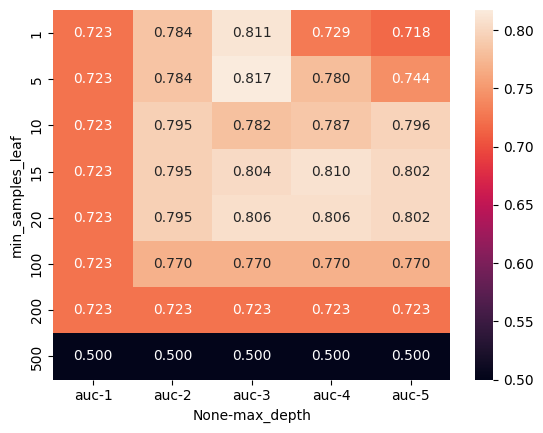

In [48]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [49]:
# look at the model using the optimal max_depth and min_samples_leaf

dv, dt_model = train_decision_tree_classifier(df_train, y_train, max_depth=3, min_samples_leaf=5)
y_pred = predict_decision_tree_classifier(df_val, dv, dt_model)

In [50]:
print(export_text(model, feature_names=list(dv.get_feature_names_out())))

|--- chestpaintype=ASY <= 0.50
|   |--- class: 0
|--- chestpaintype=ASY >  0.50
|   |--- class: 1



In [51]:
dt_model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1)

## Train random forest model

In [52]:
def train_random_forest_classifier(df_train, y_train, max_depth=None, min_samples_leaf=1, n_estimators=100):
    train_dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    
    model = RandomForestClassifier(random_state=seed,
                                   max_depth=max_depth,
                                   min_samples_leaf=min_samples_leaf,
                                   n_estimators=n_estimators)
    model.fit(X_train, y_train)

    return dv, model

In [53]:
def predict_random_forest_classifier(df, dv, model):
    val_dicts = df[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    y_pred = model.predict_proba(X_val)[:, 1]

    return y_pred

In [54]:
dv, rf_model = train_random_forest_classifier(df_train, y_train)
y_pred = predict_random_forest_classifier(df_val, dv, rf_model)

In [55]:
roc_auc_score(y_val, y_pred)

0.8329564725833805

In [56]:
# determine optimal n_estimators
scores = []

for n in range(10, 201, 10):
    dv, model = train_random_forest_classifier(df_train,
                                               y_train,
                                               n_estimators=n)
    y_pred = predict_random_forest_classifier(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))
scores

[(10, 0.8155737704918032),
 (20, 0.8062464669304692),
 (30, 0.8055398530243074),
 (40, 0.8165630299604296),
 (50, 0.8260316563029961),
 (60, 0.8309779536461277),
 (70, 0.8345110231769362),
 (80, 0.8342283776144714),
 (90, 0.8332391181458451),
 (100, 0.8329564725833805),
 (110, 0.8316845675522894),
 (120, 0.8304126625211984),
 (130, 0.8288581119276428),
 (140, 0.8328151498021481),
 (150, 0.833663086489542),
 (160, 0.8325325042396835),
 (170, 0.8330977953646128),
 (180, 0.8328151498021481),
 (190, 0.8338044092707745),
 (200, 0.8332391181458452)]

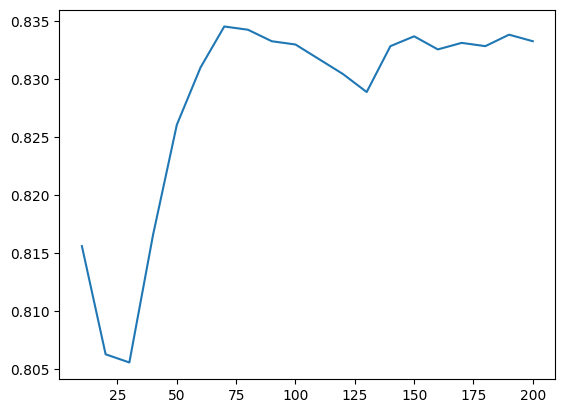

In [57]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

In [58]:
n_estimators_rf = 70

In [59]:
# determine optimal max_depth
scores = []
depths = [3, 5, 10, 15]

for d in depths:
    for n in range(10, 201, 10):
        dv, model = train_random_forest_classifier(df_train,
                                                   y_train,
                                                   max_depth=d,
                                                   n_estimators=n)
        y_pred = predict_random_forest_classifier(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

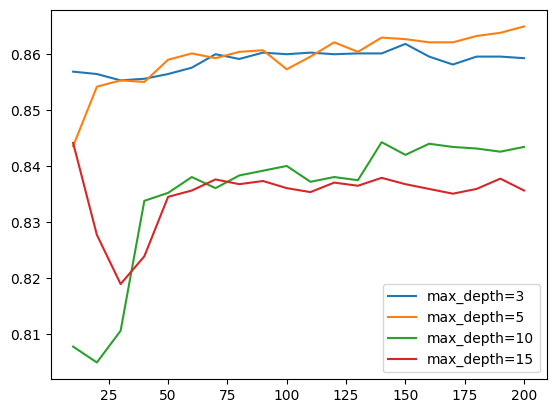

In [60]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

for d in depths:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [61]:
max_depth = 5

In [62]:
# determine optimal min_samples_leaf
scores = []
min_samples_leaf_rf = [1, 3, 5, 10, 50]

for s in min_samples_leaf_rf:
    for n in range(10, 201, 10):
        dv, model = train_random_forest_classifier(df_train,
                                                   y_train,
                                                   max_depth=max_depth,
                                                   min_samples_leaf=s,
                                                   n_estimators=n)
        y_pred = predict_random_forest_classifier(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [63]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

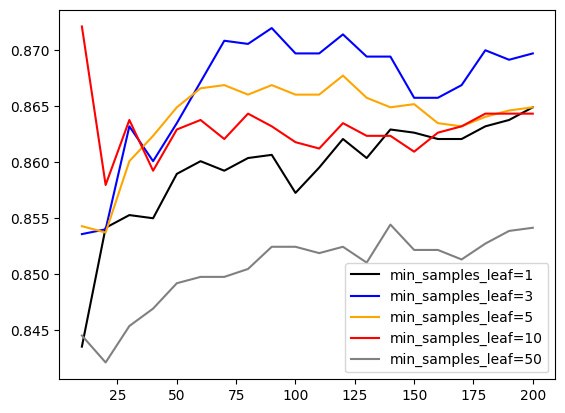

In [64]:
colors = ['black', 'blue', 'orange', 'red', 'grey']

for s, col in zip(min_samples_leaf_rf, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [65]:
[s for s in scores if s[0] == 3]

[(3, 10, 0.8535895986433013),
 (3, 20, 0.8540135669869983),
 (3, 30, 0.8631995477671002),
 (3, 40, 0.8600904465799887),
 (3, 50, 0.8634821933295647),
 (3, 60, 0.8671565856416055),
 (3, 70, 0.8708309779536462),
 (3, 80, 0.8705483323911816),
 (3, 90, 0.8719615602035048),
 (3, 100, 0.8697003957037874),
 (3, 110, 0.8697003957037874),
 (3, 120, 0.8713962690785755),
 (3, 130, 0.8694177501413228),
 (3, 140, 0.8694177501413227),
 (3, 150, 0.865743357829282),
 (3, 160, 0.8657433578292821),
 (3, 170, 0.8668739400791408),
 (3, 180, 0.8699830412662521),
 (3, 190, 0.8691351045788581),
 (3, 200, 0.8697003957037874)]

In [66]:
# final random forest model
dv, rf_model = train_random_forest_classifier(df_train, y_train, max_depth=5, min_samples_leaf=3, n_estimators=70)
y_pred = predict_random_forest_classifier(df_val, dv, rf_model)
rf_model

RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=70,
                       random_state=1)

## Train XGBoost model

In [67]:
import xgboost as xgb

In [68]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [69]:
X_train, dv = get_xtrain()
X_val = get_xval(df_val, dv)

features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [70]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [71]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

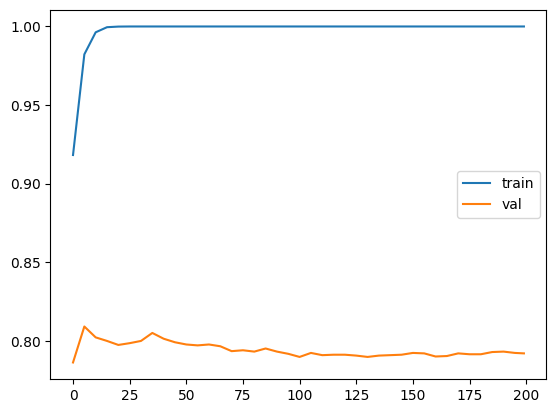

In [72]:
df_score = parse_xgb_output(output)
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [73]:
# determine optimal max_depth
scores = {}

In [74]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 5,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [75]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=5'

In [76]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 8,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [77]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=8'

In [78]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [79]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [80]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 11,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [81]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=11'

In [82]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 12,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [83]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=12'

In [84]:
# the scores in max_depth=12 stomp on max_depth=11 scores, so delete it
del scores['max_depth=12']

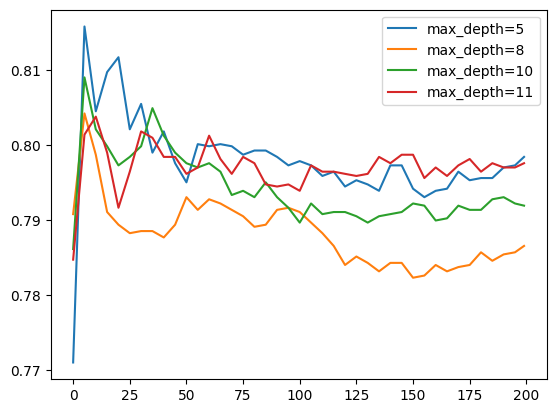

In [85]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.legend()

In [86]:
max_depth_xgb = 5

In [87]:
# determine optimal eta
scores = {}

In [88]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': max_depth_xgb,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [89]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [90]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': max_depth_xgb,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [91]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

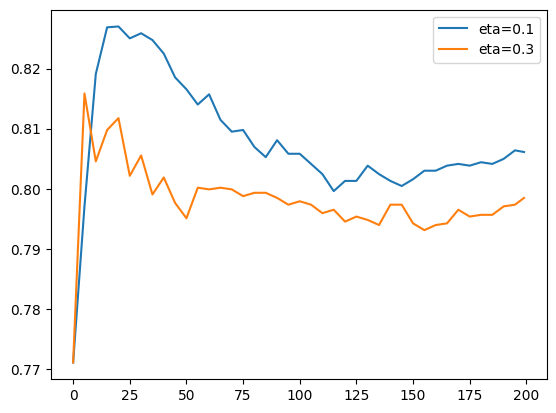

In [92]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.legend()

In [93]:
eta_xgb = 0.1

In [94]:
# determine min_child_weight
scores = {}

In [95]:
%%capture output

xgb_params = {
    'eta': eta_xgb,
    'max_depth': max_depth_xgb,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [96]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [97]:
%%capture output

xgb_params = {
    'eta': eta_xgb,
    'max_depth': max_depth_xgb,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [98]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

In [99]:
%%capture output

xgb_params = {
    'eta': eta_xgb, 
    'max_depth': max_depth_xgb,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [100]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

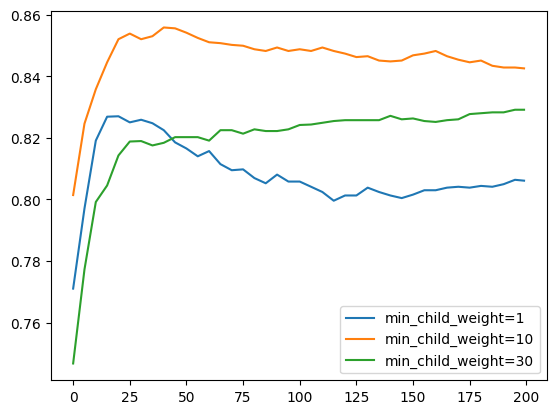

In [101]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.legend()

In [102]:
min_child_weight = 10

In [103]:
# final model
xgb_params = {
    'eta': eta_xgb, 
    'max_depth': max_depth_xgb,
    'min_child_weight': min_child_weight,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                      verbose_eval=5,
                      evals=watchlist)

[0]	train-auc:0.85280	val-auc:0.80144
[5]	train-auc:0.86892	val-auc:0.82462
[10]	train-auc:0.87795	val-auc:0.83578
[15]	train-auc:0.88579	val-auc:0.84454
[20]	train-auc:0.89188	val-auc:0.85204
[25]	train-auc:0.89535	val-auc:0.85387
[30]	train-auc:0.89802	val-auc:0.85204
[35]	train-auc:0.90134	val-auc:0.85302
[40]	train-auc:0.90405	val-auc:0.85585
[45]	train-auc:0.90610	val-auc:0.85557
[50]	train-auc:0.90884	val-auc:0.85415
[55]	train-auc:0.91156	val-auc:0.85246
[60]	train-auc:0.91344	val-auc:0.85105
[65]	train-auc:0.91570	val-auc:0.85076
[70]	train-auc:0.91691	val-auc:0.85020
[75]	train-auc:0.91887	val-auc:0.84992
[80]	train-auc:0.92038	val-auc:0.84878
[85]	train-auc:0.92187	val-auc:0.84822
[90]	train-auc:0.92391	val-auc:0.84935
[95]	train-auc:0.92570	val-auc:0.84822
[100]	train-auc:0.92721	val-auc:0.84878
[105]	train-auc:0.92870	val-auc:0.84822
[110]	train-auc:0.92985	val-auc:0.84935
[115]	train-auc:0.93081	val-auc:0.84822
[120]	train-auc:0.93148	val-auc:0.84737
[125]	train-auc:0.9321

# Select model

In [104]:
X_train, dv = get_xtrain()
X_val = get_x_nontrain(df_val, dv)
X_test = get_x_nontrain(df_test, dv)

## Logistic regression

In [105]:
model_lr = LogisticRegression(C=0.5, max_iter=2000, random_state=1)
model_lr.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=2000, random_state=1)

In [106]:
y_pred = model_lr.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8338384738812622

## Decision tree

In [107]:
model_dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1)

In [108]:
y_pred = model_dt.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8042431806026029

## Random forest

In [109]:
model_rf = RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=70,
                       random_state=1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=70,
                       random_state=1)

In [110]:
y_pred = model_rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8457835621322874

## XGBoost

In [124]:
xgb_params = {
    'eta': eta_xgb, 
    'max_depth': max_depth_xgb,
    'min_child_weight': min_child_weight,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [125]:
y_pred = model_xgb.predict(dval)
roc_auc_score(y_val, y_pred)

0.8425664217071791

In [126]:
df_full_train_xgb = df_full_train.reset_index(drop=True)

In [127]:
y_full_train = (df_full_train.heartdisease == 1).astype(int).values

In [128]:
del df_full_train_xgb['heartdisease']

In [129]:
dicts_full_train = df_full_train_xgb.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [130]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names_out().tolist())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out().tolist())

In [131]:
# now train model using dfulltrain
model_xgb = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

In [132]:
y_pred = model_xgb.predict(dtest)

In [133]:
roc_auc_score(y_test, y_pred)

0.9413442681404884

## Conclusion

| Model | AUC Score |
|---|---|
| Logistic Regression | 0.8338384738812622 |
| Decision Tree | 0.8042431806026029 |
| Random Forest | 0.8457835621322874 |
| XGBoost | 0.9413442681404884 |

Although the XGBoost model has the highest AUC score using the test set, it seems suspect because using the validation set yields a lower AUC. Because I am running out of time, I am going to pick the random forest model to deploy and try to figure out what I did wrong with the XGBoost model.